# Logistic Regression

### Introduction
Logistic Regression is a Machine Learning classification algorithm that is used to predict the probability of a categorical dependent variable. In logistic regression, the dependent variable is a binary variable that contains data coded as 1 (yes, success, etc.) or 0 (no, failure, etc.). In other words, the logistic regression model predicts P(Y=1) as a function of X.

### Assumptions:

First, binary logistic regression requires the dependent variable to be binary and ordinal logistic regression requires the dependent variable to be ordinal.

Second, logistic regression requires the observations to be independent of each other.  In other words, the observations should not come from repeated measurements or matched data.

Third, logistic regression requires there to be little or no multicollinearity among the independent variables.  This means that the independent variables should not be too highly correlated with each other.

Fourth, logistic regression assumes linearity of independent variables and log odds.  although this analysis does not require the dependent and independent variables to be related linearly, it requires that the independent variables are linearly related to the log odds.

Finally, logistic regression typically requires a large sample size.  A general guideline is that you need at minimum of 10 cases with the least frequent outcome for each independent variable in your model. For example, if you have 5 independent variables and the expected probability of your least frequent outcome is .10, then you would need a minimum sample size of 500 (10*5 / .10).

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [4]:
data=pd.read_csv('C:/Users/Akshat/Downloads/binary.csv')

In [5]:
data.head(2)

,admit,gre,gpa,rank
0,0,380,3.61,3
1,1,660,3.67,3


In [6]:
data.shape

(400, 4)

In [7]:
data.columns

Index(['admit', 'gre', 'gpa', 'rank'], dtype='object')

In [8]:
data.dtypes

admit      int64
gre        int64
gpa      float64
rank       int64
dtype: object

In [10]:
data.admit.unique()

array([0, 1], dtype=int64)

In [12]:
data.isnull().any()

admit    False
gre      False
gpa      False
rank     False
dtype: bool

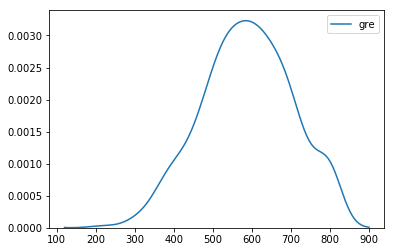

In [13]:
sns.kdeplot(data['gre'])

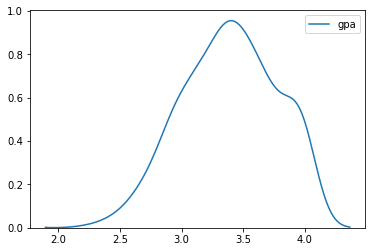

In [14]:
sns.kdeplot(data['gpa'])

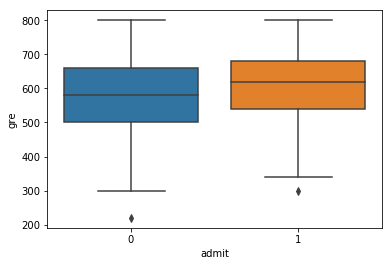

In [19]:
sns.boxplot(x=data['admit'],y=data['gre'],data=data)

In [22]:
X=data[data.columns.difference(['admit'])]
X.head(2)

,gpa,gre,rank
0,3.61,380,3
1,3.67,660,3


In [23]:
Y=data['admit']

In [24]:
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.30, random_state=42)

In [26]:
from sklearn import linear_model
lm = linear_model.LogisticRegression()
model = lm.fit(X_train,Y_train)

In [27]:
pred=model.predict(X_test)

In [29]:
from sklearn import metrics
#Checking the accuracy of our model by comparing it with the actual value
print (metrics.accuracy_score(Y_test,pred))

0.758333333333


In [30]:
from sklearn.metrics import confusion_matrix
confusion_matrix = confusion_matrix(Y_test,pred)
print(confusion_matrix)

[[81  0]
 [29 10]]


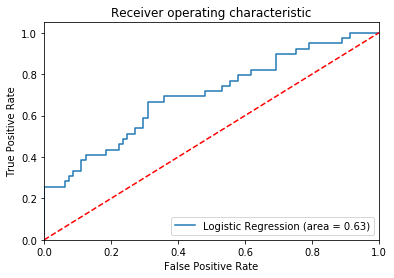

In [32]:
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve
logit_roc_auc = roc_auc_score(Y_test, lm.predict(X_test))
fpr, tpr, thresholds = roc_curve(Y_test, lm.predict_proba(X_test)[:,1])
plt.figure()
plt.plot(fpr, tpr, label='Logistic Regression (area = %0.2f)' % logit_roc_auc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.savefig('Log_ROC')
plt.show()

In [72]:
from sklearn.metrics import classification_report
print(classification_report(Y_test, pred))
pd.crosstab(Y_test, pred, rownames=['Actual'], colnames=['Predicted'])

             precision    recall  f1-score   support

          0       0.74      1.00      0.85        81
          1       1.00      0.26      0.41        39

avg / total       0.82      0.76      0.71       120



Predicted,0,1
Actual,,
0,81,0
1,29,10


In [38]:
import statsmodels.api as sm
logit_model=sm.Logit(Y_train,X_train)
result=logit_model.fit()
print(result.summary())

C:\Users\Akshat\Anaconda3\lib\site-packages\statsmodels\compat\pandas.py:56: FutureWarning: The pandas.core.datetools module is deprecated and will be removed in a future version. Please use the pandas.tseries module instead.
  from pandas.core import datetools


Optimization terminated successfully.
         Current function value: 0.589150
         Iterations 5
                           Logit Regression Results                           
Dep. Variable:                  admit   No. Observations:                  280
Model:                          Logit   Df Residuals:                      277
Method:                           MLE   Df Model:                            2
Date:                Mon, 09 Apr 2018   Pseudo R-squ.:                 0.05355
Time:                        21:06:03   Log-Likelihood:                -164.96
converged:                       True   LL-Null:                       -174.30
                                        LLR p-value:                 8.833e-05
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
gpa            0.1049      0.235      0.445      0.656      -0.357       0.566
gre            0.0007      0.

In [43]:
from sklearn import model_selection
from sklearn.model_selection import cross_val_score
kfold = model_selection.KFold(n_splits=10, random_state=7)
modelCV = linear_model.LogisticRegression()
scoring = 'accuracy'
results = model_selection.cross_val_score(modelCV, X_train, Y_train, cv=kfold, scoring=scoring)
print("10-fold cross validation average accuracy: %.3f" % (results.mean()))

10-fold cross validation average accuracy: 0.689


In [65]:
k=range(2,11)
a=[]
for i in k:
    kfold = model_selection.KFold(n_splits=i, random_state=7)
    modelCV = linear_model.LogisticRegression()
    scoring = 'accuracy'
    results=(model_selection.cross_val_score(modelCV, X_train, Y_train, cv=kfold, scoring=scoring))
    a.append(results.mean())

In [47]:
np.arange(1,10)

array([1, 2, 3, 4, 5, 6, 7, 8, 9])

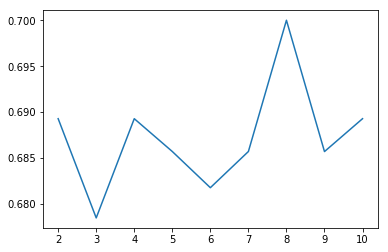

In [70]:
plt.plot(k,a)

In [73]:
model.coef_

array([[ 0.34555001,  0.00108012, -0.57744705]])

In [81]:
z=(np.exp(model.coef_))
z[0]

array([ 1.41276675,  1.0010807 ,  0.56132959])

In [75]:
X.columns

Index(['gpa', 'gre', 'rank'], dtype='object')

In [83]:
pd.DataFrame(z[0],index=X.columns,columns=['odd_ratio'])

,odd_ratio
gpa,1.412767
gre,1.001081
rank,0.561330


In [84]:
new_data=pd.read_csv('C:/Users/Akshat/Downloads/diabetes.csv')

In [85]:
new_data.head(2)

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0


In [86]:
new_data.shape

(768, 9)

In [87]:
new_data.columns

Index(['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'DiabetesPedigreeFunction', 'Age', 'Outcome'],
      dtype='object')

In [88]:
new_data.dtypes

Pregnancies                   int64
Glucose                       int64
BloodPressure                 int64
SkinThickness                 int64
Insulin                       int64
BMI                         float64
DiabetesPedigreeFunction    float64
Age                           int64
Outcome                       int64
dtype: object

In [91]:
new_data.isnull().any()

Pregnancies                 False
Glucose                     False
BloodPressure               False
SkinThickness               False
Insulin                     False
BMI                         False
DiabetesPedigreeFunction    False
Age                         False
Outcome                     False
dtype: bool

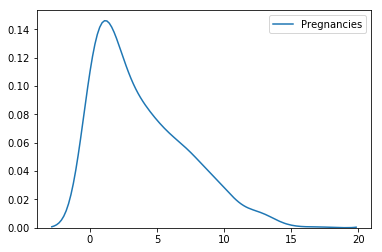

In [93]:
sns.kdeplot(new_data['Pregnancies'])

In [96]:
X=new_data[new_data.columns.difference(['Outcome'])]
Y=new_data['Outcome']

In [97]:
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.30, random_state=42)

In [99]:
from sklearn.linear_model import LogisticRegression
log=LogisticRegression()

In [100]:
log.fit(X_train,Y_train)
pred=log.predict(X_test)

In [105]:
from sklearn import metrics
from sklearn.metrics import confusion_matrix
#Checking the accuracy of our model by comparing it with the actual value
print (metrics.accuracy_score(Y_test,pred))
print(confusion_matrix(Y_test,pred))

0.757575757576
[[126  25]
 [ 31  49]]


In [114]:
from sklearn.metrics import classification_report
print(classification_report(Y_test, pred))

             precision    recall  f1-score   support

          0       0.80      0.83      0.82       151
          1       0.66      0.61      0.64        80

avg / total       0.75      0.76      0.76       231



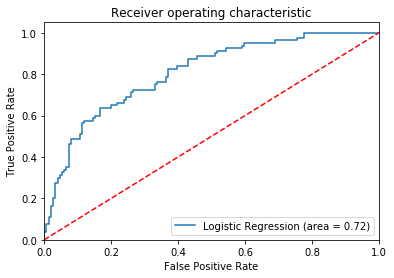

In [115]:
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve
logit_roc_auc = roc_auc_score(Y_test, log.predict(X_test))
fpr, tpr, thresholds = roc_curve(Y_test, log.predict_proba(X_test)[:,1])
plt.figure()
plt.plot(fpr, tpr, label='Logistic Regression (area = %0.2f)' % logit_roc_auc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.savefig('Log_ROC')
plt.show()

In [116]:
from sklearn import datasets
from sklearn.feature_selection import RFE
from sklearn.linear_model import LogisticRegression
logreg = LogisticRegression()
rfe = RFE(logreg, 7)
rfe = rfe.fit(X_train, Y_train)
print(rfe.support_)
print(rfe.ranking_)

[ True  True  True  True  True False  True  True]
[1 1 1 1 1 2 1 1]


In [117]:
X_train.columns

Index(['Age', 'BMI', 'BloodPressure', 'DiabetesPedigreeFunction', 'Glucose',
       'Insulin', 'Pregnancies', 'SkinThickness'],
      dtype='object')

In [118]:
# removing insulin to check accuracy
del X['Insulin']

In [121]:
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.30, random_state=42)
log=LogisticRegression()
log.fit(X_train,Y_train)
pred=log.predict(X_test)
print (metrics.accuracy_score(Y_test,pred))
print(confusion_matrix(Y_test,pred))
from sklearn.metrics import classification_report
print(classification_report(Y_test, pred))

0.766233766234
[[127  24]
 [ 30  50]]
             precision    recall  f1-score   support

          0       0.81      0.84      0.82       151
          1       0.68      0.62      0.65        80

avg / total       0.76      0.77      0.76       231



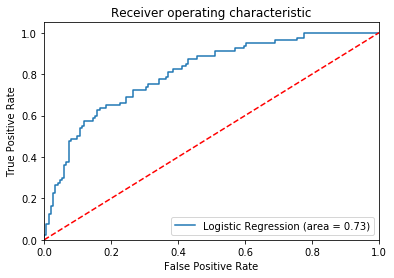

In [122]:
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve
logit_roc_auc = roc_auc_score(Y_test, log.predict(X_test))
fpr, tpr, thresholds = roc_curve(Y_test, log.predict_proba(X_test)[:,1])
plt.figure()
plt.plot(fpr, tpr, label='Logistic Regression (area = %0.2f)' % logit_roc_auc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.savefig('Log_ROC')
plt.show()

In [123]:
from sklearn import datasets
from sklearn.feature_selection import RFE
from sklearn.linear_model import LogisticRegression
logreg = LogisticRegression()
rfe = RFE(logreg, 6)
rfe = rfe.fit(X_train, Y_train)
print(rfe.support_)
print(rfe.ranking_)

[ True  True  True  True  True  True False]
[1 1 1 1 1 1 2]


In [124]:
X.head()

,Age,BMI,BloodPressure,DiabetesPedigreeFunction,Glucose,Pregnancies,SkinThickness
0,50,33.6,72,0.627,148,6,35
1,31,26.6,66,0.351,85,1,29
2,32,23.3,64,0.672,183,8,0
3,21,28.1,66,0.167,89,1,23
4,33,43.1,40,2.288,137,0,35


In [125]:
del X['SkinThickness']

In [126]:
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.30, random_state=42)
log=LogisticRegression()
log.fit(X_train,Y_train)
pred=log.predict(X_test)
print (metrics.accuracy_score(Y_test,pred))
print(confusion_matrix(Y_test,pred))
from sklearn.metrics import classification_report
print(classification_report(Y_test, pred))

0.757575757576
[[125  26]
 [ 30  50]]
             precision    recall  f1-score   support

          0       0.81      0.83      0.82       151
          1       0.66      0.62      0.64        80

avg / total       0.76      0.76      0.76       231



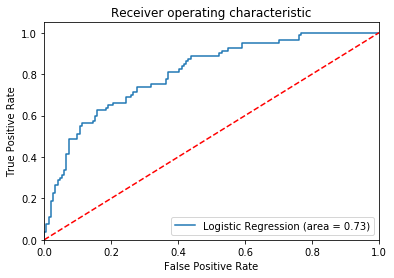

In [127]:
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve
logit_roc_auc = roc_auc_score(Y_test, log.predict(X_test))
fpr, tpr, thresholds = roc_curve(Y_test, log.predict_proba(X_test)[:,1])
plt.figure()
plt.plot(fpr, tpr, label='Logistic Regression (area = %0.2f)' % logit_roc_auc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.savefig('Log_ROC')
plt.show()

In [129]:
z=(np.exp(log.coef_))
z[0]

array([ 1.02334579,  1.06445258,  0.98328009,  1.26126131,  1.02620815,
        1.06365512])

In [131]:
pd.DataFrame(z[0],index=X.columns,columns=['diabetes'])

,diabetes
Age,1.023346
BMI,1.064453
BloodPressure,0.983280
DiabetesPedigreeFunction,1.261261
Glucose,1.026208
Pregnancies,1.063655


In [132]:
k=range(2,11)
a=[]
for i in k:
    kfold = model_selection.KFold(n_splits=i, random_state=7)
    modelCV = linear_model.LogisticRegression()
    scoring = 'accuracy'
    results=(model_selection.cross_val_score(modelCV, X_train, Y_train, cv=kfold, scoring=scoring))
    a.append(results.mean())

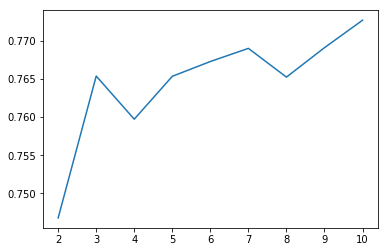

In [134]:
plt.plot(k,a)

In [146]:
sum(a)/len(a) # improvement

0.76449375938686204